In [1]:
using PyPlot

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.

In [2]:
function Runge_Kutta_4(f,x0,t0,tf,h)
    listt=t0:h:tf
    listx=[x0[1]] # Posición
    listv=[x0[2]]   #Velocidad
    for i in 2:length(listt)
       #Pasos de R.k.4 
    k1=f(x0,listt[i-1])
    k2=f(x0+(h/2)*k1,listt[i-1]+h/2) 
    k3=f(x0+(h/2)*k2,listt[i-1]+h/2) 
    k4=f(x0+h*k3,listt[i]+h)
        
    x0=x0+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x0[1])
        push!(listv,x0[2])
    end
    return listt,listx,listv
end

Runge_Kutta_4 (generic function with 1 method)

In [3]:
#La función quedaría como...#
f(x,t)=[x[2]-(x[2])^3, -x[1]-(x[2])^2]


f (generic function with 1 method)

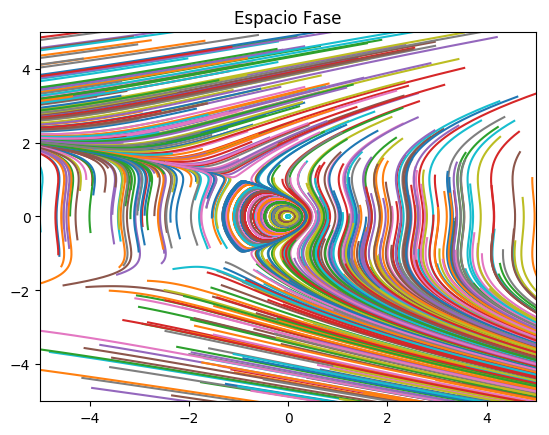

In [4]:
for i in 1:600                  #Se obtendrán 600 condiciones
    x0=(rand(2)-rand(2))*6     #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,0.0,20.0,0.01)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-5,5),ylim(-5,5)
    title("Espacio Fase")
end
;

* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

El jacobiano se define de la siguiente manera, teniendo como entradas, derivadas parciales:

$$ { J }_{ F }(x,y)=\begin{bmatrix} \frac { \partial { f }_{ 1 } }{ \partial x }  & \frac { \partial { f }_{ 1 } }{ \partial y }  \\ \frac { \partial { f }_{ 2 } }{ \partial x }  & \frac { \partial { f }_{ 2 } }{ \partial y }  \end{bmatrix} $$

Tomando los datos ${ f }_{ 1 }=y-y^3$ y  ${ f}_{ 2 }=-x-y^2$, entonces tenemos:

$${ J }_{ F }(x,y)=\begin{bmatrix} 0 & \quad 1-3y^{ 2 } \\ -1 & \quad -2y \end{bmatrix}$$

Evaluandolo en el vector cero $\vec 0$, obtenemos:

$${ J }_{ F }(0,0)=\begin{bmatrix} 0 & \quad 1 \\ -1 & \quad 0 \end{bmatrix}$$

El determinante ($\Delta$):

$$\Delta=0+1=1>0$$

Dado que la traza ($\tau$), es la suma de los elementos de la diagonal de nuestra matriz tenemos que:

$$\tau=0$$

Tenemos que el origen es un centro no-lineal estable. Cerca del origen, las trayectorias son curvas cerrradas.

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular? Usen $\mu=0.5$.

Oscilador de van der Pol
Se observa una forma de espiral al rededor del origen.
Si la analizamos de afuera hacia adentro, se podría interpretar los ciclos que tratarían de formar un circulo, pero no lo alcanzan debido al amortiguamiento.

In [5]:
#La función va a quedar...
g(x,t)=[x[2],0.5*(1-(x[1])^2)*x[2]-x[1]]

g (generic function with 1 method)

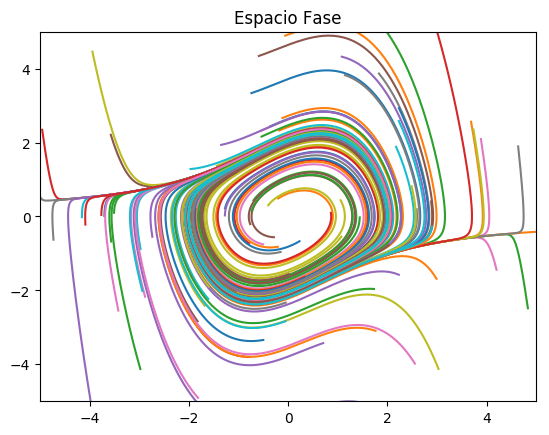

In [6]:
for i in 1:100                  #Se obtendrán 100 condiciones
    x0=(rand(2)-rand(2))*6     #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(g,x0,0.0,20.0,0.01)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-5,5),ylim(-5,5)
    title("Espacio Fase")
end
;

* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

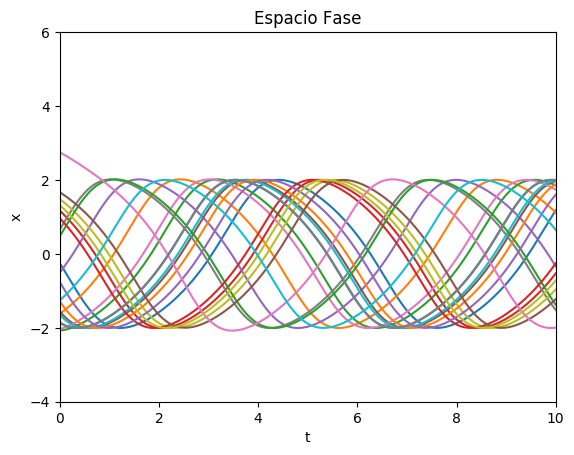

In [7]:
for i in 1:20                 #Se obtendrán 20 condiciones
    x0=9*rand(2,1)-1.5    #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(g,x0,-10.0,10.0,0.01)  
    plot(aleatorias[1],aleatorias[2])
    xlim(0,10),ylim(-4,6)
    xlabel("t"),ylabel("x")
    title("Espacio Fase")
end
;

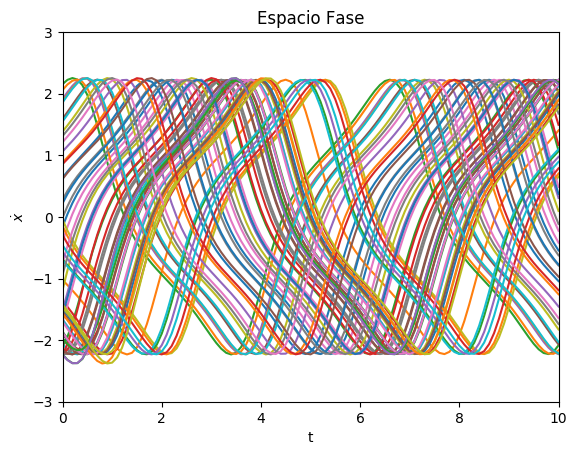

In [8]:
for i in 1:60                 #Se obtendrán 60 condiciones
    x0=9*rand(2,1)-2.5      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(g,x0,-10.0,10.0,0.1)  
    plot(aleatorias[1],aleatorias[3])
    xlim(0,10),ylim(-3,3)
    xlabel("t"), ylabel(L"\dot x")
    title("Espacio Fase")
    
end
;

__Ejercicio 3:__ Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

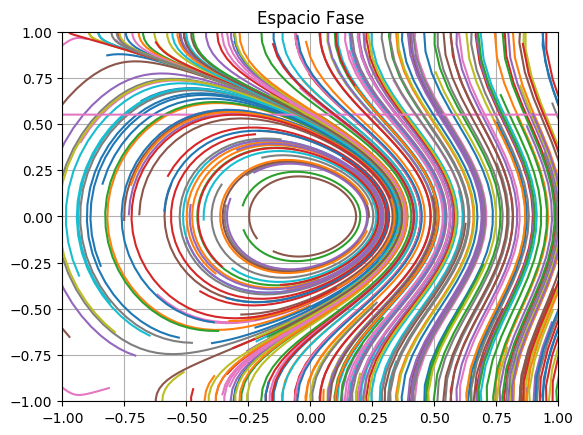

In [9]:
for i in 1:700                  #Se obtendrán 700 condiciones
    x0=5*rand(2,1)-1      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-1,1),ylim(-1,1)
   
    title("Espacio Fase")
    grid("on")
end

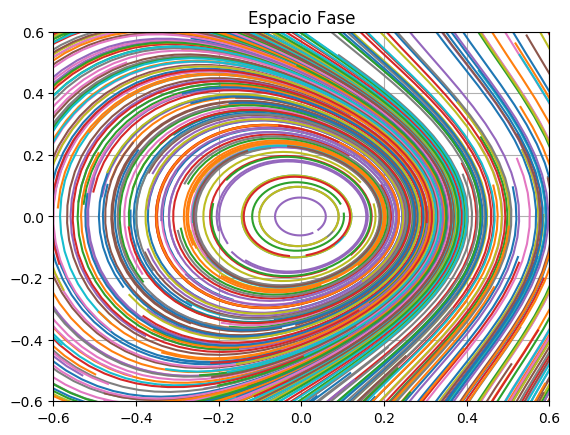

In [10]:
for i in 1:500                  #Se obtendrán 500 condiciones
    x0=2*rand(2,1)-1      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-0.6,0.6),ylim(-0.6,0.6)
   
    title("Espacio Fase")
    grid("on")
end
;

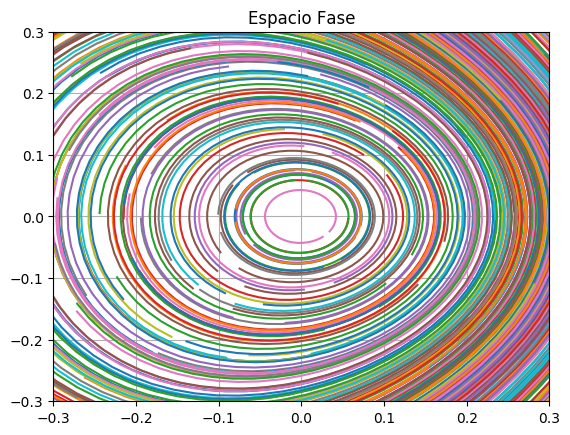

In [11]:
for i in 1:900                  #Se obtendrán 900 condiciones
    x0=2*rand(2,1)-0.6      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-0.3,0.3),ylim(-0.3,0.3)
   
    title("Espacio Fase")
    grid("on")
end


Con las diferentes trayectorias mostradas, y al manipular YLIM al hacer los código, podemos apreciar nuestro punto fijo $\vec 0$

__Ejercicio 4:__ Hacer lo mismo para el sistema:
\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}
Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$

In [12]:
#Definimos nuestra funcion
f(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-x[1]+x[2]-x[2]*(x[1]^2+x[2]^2)]

f (generic function with 1 method)

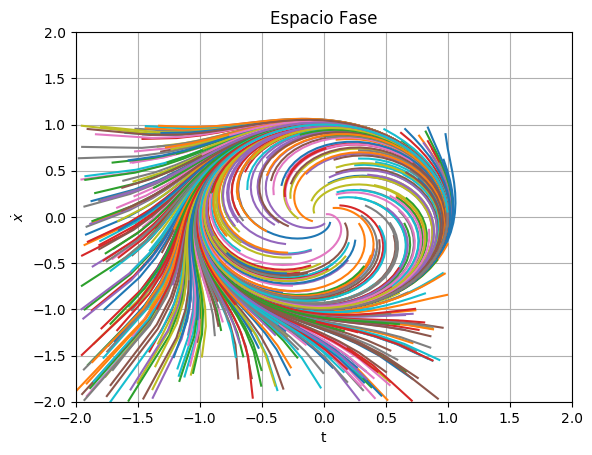

In [13]:
for i in 1:500                  #Se obtendrán 500 condiciones
    x0=3*rand(2,1)-2      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-2,2),ylim(-2,2)
    xlabel("t"), ylabel(L"\dot x")
    title("Espacio Fase")
    grid("on")
end

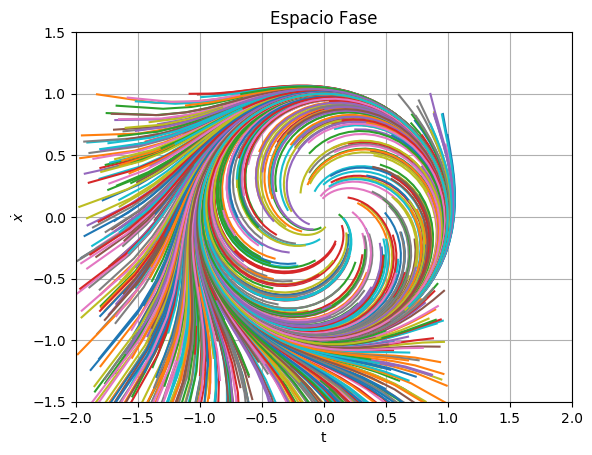

In [14]:
for i in 1:800                  #Se obtendrán 800 condiciones
    x0=3*rand(2,1)-2      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-2,2),ylim(-1.5,1.5)
    xlabel("t"), ylabel(L"\dot x")
    title("Espacio Fase"),grid("on")
    
end

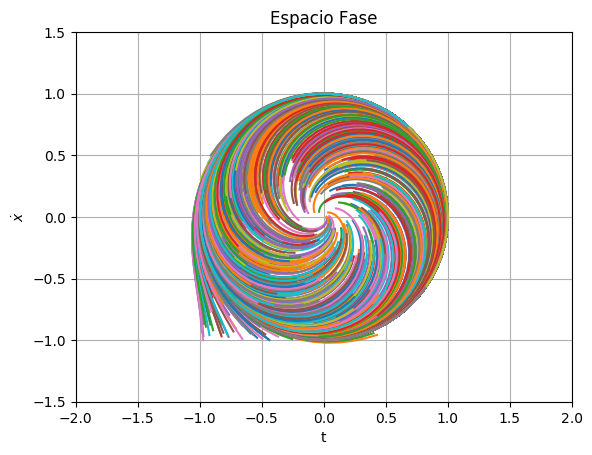

In [15]:
for i in 1:800                  #Se obtendrán 800 condiciones
    x0=1.5*rand(2,1)-1      #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.1)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-2,2),ylim(-1.5,1.5)
    xlabel("t"), ylabel(L"\dot x")
    title("Espacio Fase"),grid("on")
    
end

Con lo que se muestra abajo, podemo ver que se aproxima a 1, y con las diferentes trayectorias vemos que se tiende a formar el cìrculo unitario

In [16]:
x0=3*rand(2,1)-1.7
aleatorias=Runge_Kutta_4(f,x0,-3.0,3.0,0.01)  
aleatorias[3].^2 + aleatorias[2].^2

601-element Array{Float64,1}:
 0.941707
 0.942796
 0.943865
 0.944915
 0.945947
 0.94696 
 0.947956
 0.948934
 0.949894
 0.950838
 0.951764
 0.952674
 0.953568
 ⋮       
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     

Hacemos un proceso similar que en el ejercicio 1
$$ { J }_{ F }(x,y)=\begin{bmatrix} \frac { \partial { f }_{ 1 } }{ \partial x }  & \frac { \partial { f }_{ 1 } }{ \partial y }  \\ \frac { \partial { f }_{ 2 } }{ \partial x }  & \frac { \partial { f }_{ 2 } }{ \partial y }  \end{bmatrix} $$

$$ { J }_{ F }(x,y)=\begin{bmatrix}  1-3x^2-y^2 & -2xy+1 \\ -2yx-1  &   1-3y^2-x^2 \end{bmatrix} $$

Evaluando en $\vec 0$

$$ { J }_{ F }= \begin{bmatrix}  1 & 1 \\ -1 & 1 \end{bmatrix} $$

Entonces la traza es 2 y $ \Delta = 2$  
Con esto podemos ver que el cero es un punto repulsor